In [6]:
import numpy as np
import plotly.graph_objects as go

kd = 1.4 * np.pi
N=5

af = lambda psi: np.sin(N * psi / 2) / (N * np.sin(psi/2))

theta = np.linspace(-np.pi,np.pi,1_000)
array_factor = af(kd * np.cos(theta))
theta_to_graph=180*theta/np.pi
fig = go.Figure([go.Scatterpolar(
        r = array_factor,
        theta = theta_to_graph,
        mode = 'lines',
        line_color = 'deepskyblue'
    )])

fig.show()

In [53]:
import numpy as np
import plotly.graph_objects as go

kd = 1.4 * np.pi
phase = 30*np.pi/180
phase=-kd*np.cos(phase)

theta = np.linspace(-np.pi,np.pi,1_000)
array_factor = af(kd * np.cos(theta) + phase)
theta_to_graph=180*theta/np.pi
fig = go.Figure([go.Scatterpolar(
        r = array_factor,
        theta = theta_to_graph,
        mode = 'lines',
        line_color = 'deepskyblue'
    )])

fig.show()

In [46]:
import numpy as np

theta_lower, theta_upper = 0, np.pi
phi_lower, phi_upper = 0, 2*np.pi
sample_points = 100_000
d_phi=(phi_upper-phi_lower)/sample_points
d_theta=(theta_upper-theta_lower)/sample_points


theta_range = np.linspace(theta_lower, theta_upper, num=sample_points)
phi_range = np.linspace(phi_lower, phi_upper, num = sample_points)

np.seterr(invalid='ignore')#supress 0/0 errors

phases = np.linspace(0, 2*np.pi, num=400)

D_in_dB = np.zeros(400)
for i, phase in enumerate(phases):
    array_factor = af(kd * np.cos(theta_range) + phase)
    p_rad = (array_factor**2)*np.sin(theta_range)
    D = 4*np.pi/np.trapz(p_rad, x=theta_range)
    D_in_dB[i] = 10*np.log10(abs(D))

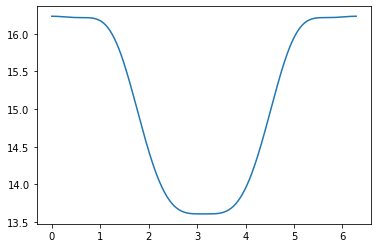

In [47]:
import matplotlib.pyplot as plt

plt.plot(phases, D_in_dB)

In [50]:
max(D_in_dB)-min(D_in_dB)

2.6234232210386725

In [3]:
import numpy as np
import plotly.graph_objects as go

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.cos(x) + np.random.random(100)

from scipy.signal import savgol_filter
# Savitzky-Golay filter
y_filtered = savgol_filter(y, 99, 3)

fig = go.Figure([
        go.Scatter(
        x = x,
        y = y,
        mode = 'lines',
        line_color = 'deepskyblue',
        name="Raw data"
    ),
        go.Scatter(
        x = x,
        y = y_filtered,
        mode = 'lines',
        line_color = 'green',
        name = "Savitzky–Golay Filtered"
    ),
    ])

fig.show()

In [13]:
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter
from typing import List, Union
CUTOFF = 250
ORDER = 6

def butter_lowpass(cutoff, fs, order=5) -> List[Union[np.ndarray, np.ndarray]]:
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return [b, a]

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


def get_period(n: int) -> int:
    for index in range(2,int(np.sqrt(n))+1):
        if (n%index) == 0:
            return index
    return 1

def lowpass(data_series: pd.Series) -> pd.Series:
    T = get_period(data_series.shape[0])
    fs = data_series.shape[0]//T

    filtered = butter_lowpass_filter(data_series, CUTOFF, fs, ORDER)

    return filtered

x = np.linspace(0, 2*np.pi, 5000)
y = np.sin(x) + np.cos(500*x) + np.cos(2500*x) + np.random.random(5000)

y_filtered = lowpass(y)
fig = go.Figure([
        go.Scatter(
        x = x,
        y = y,
        mode = 'lines',
        line_color = 'deepskyblue',
        name="Raw data"
    ),
        go.Scatter(
        x = x,
        y = y_filtered,
        mode = 'lines',
        line_color = 'green',
        name = "Butterworth Filtered"
    ),
    ])

fig.show()

In [18]:
from scipy import signal
import matplotlib.pyplot as plt

sys = signal.TransferFunction([1], [1, 1])
w, mag, phase = signal.bode(sys)

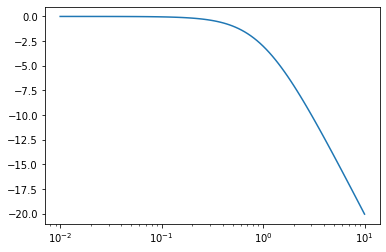

In [19]:
plt.semilogx(w, mag) 

In [30]:
import numpy as np
import plotly.graph_objects as go

x = np.linspace(0, 10_000, 5_000)
y = 1/np.sqrt(1+(x/250)**12)

mag = 20*np.log(y)
ang = -np.arctan(y)*180/2

fig = go.Figure([
        go.Scatter(
        x = x,
        y = ang,
        mode = 'lines',
        line_color = 'deepskyblue',
        name="Impulse response",
    )])

fig.update_xaxes(type="log", range=[0,4])
fig.show()